In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn
plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [2]:
#Import data
train=pd.read_csv('titanic-data/train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Questão 1: 

Qual é a idade média dos passageiros do Titanic?

In [4]:
train['Age'].mean()

29.69911764705882

## Questão 2: 

Qual é a idade média dos passageiros que não sobreviveram?

In [5]:
not_survived = train[train['Survived']==0]
not_survived['Age'].mean()

30.62617924528302

In [6]:
# Shorter and less expensive (no need to create new variables) solution:
train[train['Survived']==0]['Age'].mean()

30.62617924528302

## Questão 3: 

Qual a fracção de sobreviventes dentro das mulheres com idade igual ou superior a 40 anos?

In [7]:
# Solution with filters
female=train[train['Sex']=='female']
female40=female[female['Age']>=40]
female40['Survived'].mean()

0.7777777777777778

In [8]:
# Shorter and less expensive (no need to create new variables) solution:
train[(train['Sex']=='female') & (train['Age']>=40)]['Survived'].mean()

0.7777777777777778

In [9]:
# Solution using groupby
age=pd.cut(train['Age'],[0,40,100])
train.groupby(['Sex',age])['Survived'].mean()

Sex     Age      
female  (0, 40]      0.751174
        (40, 100]    0.770833
male    (0, 40]      0.213675
        (40, 100]    0.176471
Name: Survived, dtype: float64

## Questão 4:

Vamos definir 'AgeGroup' como a idade arredondada às dezenas. Portanto há um age group [0, 10[, outro [10, 20[, etc.

Produzam um CSV com o seguinte conteúdo:
Sex,AgeGroup,SurvivalRate
Male,0-10,XXX
Male,10-20,YYY
Male,20-30,ZZZ
...
Male,90-100,WWW
Female,0-10,AAA
Female,10-20,BBB
...
Female,90-100,CCC

Onde XXX, YYY, ZZZ, AAA, etc são as fracções de sobreviventes em cada um desses grupos.

Embora naturalmente possam responder a isto fazendo a questão 3 repetidas vezes, eu quero que usem a função 'groupby' do pandas.

In [10]:
age=pd.cut(train['Age'],[0,1,10,20,30,40,50,60,70,80,90,100])
Q4=train.groupby(['Sex',age])['Survived'].mean()
#Q4.to_csv('Q4.csv')
print(Q4)

Sex     Age      
female  (0, 1]       1.000000
        (1, 10]      0.555556
        (10, 20]     0.739130
        (20, 30]     0.753086
        (30, 40]     0.836364
        (40, 50]     0.677419
        (50, 60]     0.928571
        (60, 70]     1.000000
        (70, 80]          NaN
        (80, 90]          NaN
        (90, 100]         NaN
male    (0, 1]       0.800000
        (1, 10]      0.478261
        (10, 20]     0.144928
        (20, 30]     0.154362
        (30, 40]     0.230000
        (40, 50]     0.218182
        (50, 60]     0.142857
        (60, 70]     0.071429
        (70, 80]     0.200000
        (80, 90]          NaN
        (90, 100]         NaN
Name: Survived, dtype: float64


## Questão 5:

Fazer dois gráficos, um para homens e um para mulheres, a mostrar o resultado da pergunta 4

In [11]:
graph=Q4.unstack().transpose()
graph

Sex,female,male
Age,,
"(0, 1]",1.000000,0.800000
"(1, 10]",0.555556,0.478261
"(10, 20]",0.739130,0.144928
"(20, 30]",0.753086,0.154362
"(30, 40]",0.836364,0.230000
"(40, 50]",0.677419,0.218182
"(50, 60]",0.928571,0.142857
"(60, 70]",1.000000,0.071429
"(70, 80]",NaN,0.200000


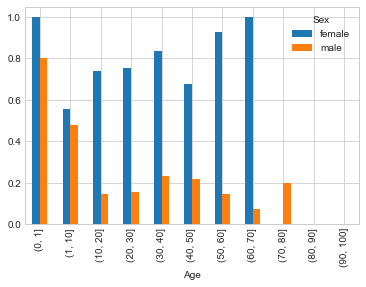

In [12]:
graph.plot.bar()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1f1cbad0>,
      dtype=object)

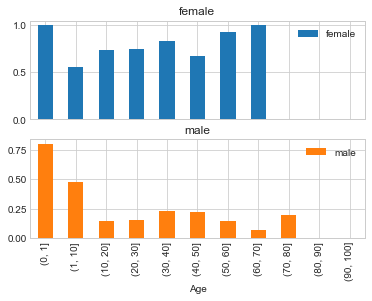

In [13]:
graph.plot.bar(subplots=True)

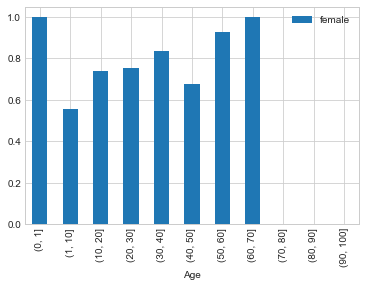

In [14]:
graph.plot.bar(y='female')

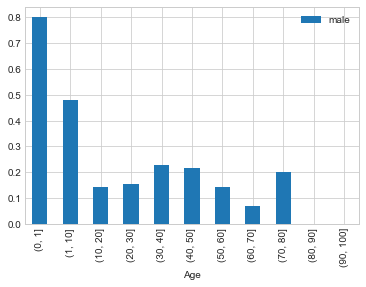

In [15]:
graph.plot.bar(y='male')